Importing the Dependencies

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split


In [ ]:
# loading the dataset to a Pandas DataFrame
credit_card_data = pd.read_csv('credit_data.csv')

In [ ]:
# first 5 rows of the dataset
credit_card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [ ]:
credit_card_data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
27814,34711,1.443955,-1.052462,-0.141721,-1.564017,-0.966274,-0.333886,-0.777060,0.023616,-2.168826,1.612206,0.979400,-0.979711,-1.193576,0.454361,0.072401,-0.545032,0.635670,-0.218439,0.095205,-0.411962,-0.479940,-1.165220,0.155226,-0.409701,0.179672,-0.446258,0.004329,0.000060,32.39,0.0
27815,34711,-0.263364,0.931818,1.193111,-0.507924,0.862019,0.249381,0.815449,-0.090801,-0.520583,0.051952,0.293997,0.474617,0.860997,-0.091397,0.199928,0.674927,-1.281747,0.472122,0.815307,0.265066,-0.310112,-0.648621,-0.253746,-1.030111,-0.046091,0.107328,0.101296,-0.124600,1.49,0.0
27816,34712,0.976345,-1.024867,0.978714,0.639442,-1.413711,0.311635,-0.909035,0.232423,-0.493025,0.846472,0.350467,0.181508,-0.516456,0.002607,-0.142228,-0.850300,-0.472691,2.122571,-0.787646,-0.280743,-0.279978,-0.599463,-0.081403,-0.059427,0.202311,-0.405753,0.055109,0.052975,151.00,0.0
27817,34712,1.464604,-0.437919,-0.018869,-1.057177,-0.154243,0.251215,-0.584866,-0.025483,-0.841369,0.537858,-1.033073,-0.362563,1.451237,-0.416840,1.054877,1.303100,-0.072773,-1.700526,0.771099,0.147174,-0.148384,-0.454571,-0.019732,-1.313689,0.379650,-0.368497,0.031746,0.007238,8.00,0.0
27818,34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# dataset informations
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27819 entries, 0 to 27818
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    27819 non-null  int64  
 1   V1      27818 non-null  float64
 2   V2      27818 non-null  float64
 3   V3      27818 non-null  float64
 4   V4      27818 non-null  float64
 5   V5      27818 non-null  float64
 6   V6      27818 non-null  float64
 7   V7      27818 non-null  float64
 8   V8      27818 non-null  float64
 9   V9      27818 non-null  float64
 10  V10     27818 non-null  float64
 11  V11     27818 non-null  float64
 12  V12     27818 non-null  float64
 13  V13     27818 non-null  float64
 14  V14     27818 non-null  float64
 15  V15     27818 non-null  float64
 16  V16     27818 non-null  float64
 17  V17     27818 non-null  float64
 18  V18     27818 non-null  float64
 19  V19     27818 non-null  float64
 20  V20     27818 non-null  float64
 21  V21     27818 non-null  float64
 22

In [ ]:
# checking the number of missing values in each column
credit_card_data.isnull().sum()

Time      0
V1        1
V2        1
V3        1
V4        1
V5        1
V6        1
V7        1
V8        1
V9        1
V10       1
V11       1
V12       1
V13       1
V14       1
V15       1
V16       1
V17       1
V18       1
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

In [ ]:
# distribution of legit transactions & fraudulent transactions
credit_card_data['Class'].value_counts()

0.0    27725
1.0       93
Name: Class, dtype: int64

This Dataset is highly unblanced

0 --> Normal Transaction

1 --> fraudulent transaction

In [ ]:
# separating the data for analysis
legit = credit_card_data[credit_card_data.Class == 0]
fraud = credit_card_data[credit_card_data.Class == 1]

In [ ]:
print(legit.shape)
print(fraud.shape)

(27725, 31)
(93, 31)


In [ ]:
# statistical measures of the data
legit.Amount.describe()

count    27725.000000
mean        77.232517
std        219.509762
min          0.000000
25%          6.490000
50%         19.950000
75%         69.320000
max       7879.420000
Name: Amount, dtype: float64

In [ ]:
fraud.Amount.describe()

count      93.000000
mean       96.609677
std       259.128010
min         0.000000
25%         1.000000
50%         1.100000
75%        99.990000
max      1809.680000
Name: Amount, dtype: float64

In [ ]:
# compare the values for both transactions
credit_card_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0.0,20440.754518,-0.190595,0.129284,0.765200,0.201632,-0.180681,0.092904,-0.099318,0.014884,0.405538,-0.106600,0.521489,-0.710062,0.435830,0.403248,0.046628,0.020468,0.239838,-0.068041,-0.044642,0.041673,-0.037007,-0.125822,-0.040202,0.011510,0.129192,0.022983,0.010650,0.003732,77.232517
1.0,18829.451613,-8.165086,6.134379,-11.690379,6.070066,-5.753486,-2.388962,-7.986805,4.121062,-2.922478,-6.853049,5.750330,-8.602823,0.374935,-8.477588,-0.106986,-4.832378,-7.777151,-2.739827,0.295568,0.697894,0.549621,-0.372248,-0.340859,-0.260055,0.359772,0.179521,0.832824,0.100500,96.609677


Under-Sampling

Build a sample dataset containing similar distribution of normal transactions and Fraudulent Transactions

Number of Fraudulent Transactions --> 492

In [ ]:
legit_sample = legit.sample(n=492)

Concatenating two DataFrames

In [ ]:
new_dataset = pd.concat([legit_sample, fraud], axis=0)

In [ ]:
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
15016,26349,1.214367,0.258057,0.264304,0.649676,-0.246648,-0.619994,-0.039862,-0.025098,0.135192,-0.305753,0.035271,-0.053304,-0.496097,-0.119661,1.422800,0.218925,0.313147,-0.662125,-0.551712,-0.159315,-0.268603,-0.772573,0.168073,0.014653,0.119858,0.126568,-0.011010,0.025747,0.89,0.0
1812,1409,1.138785,-0.099399,0.464925,0.818293,-0.453077,-0.248068,-0.111777,0.035022,0.561227,-0.229509,-0.558083,0.195656,-0.738969,0.101336,0.119727,-0.539556,0.350488,-1.073243,-0.143497,-0.143277,-0.196775,-0.440876,0.028348,0.101214,0.348649,0.298017,-0.015217,0.012560,32.52,0.0
11989,20706,-0.301411,1.242368,1.211200,0.138288,0.368247,-0.615556,0.637489,-0.132878,0.893312,-0.890926,0.291388,-2.653731,2.060609,0.931715,0.172753,0.500904,0.533274,0.285459,-0.094162,0.106843,-0.445750,-0.957132,-0.065459,-0.259883,-0.103915,0.065789,0.218653,0.086998,6.48,0.0
21065,31442,-0.779971,0.921537,1.055528,-0.295630,-0.219340,-1.097153,0.315757,0.014599,-0.292747,-0.125265,-0.282863,0.307412,0.766931,0.119643,1.183984,-0.121217,-0.040192,-0.319747,0.842592,0.177785,-0.018875,0.103756,-0.102710,0.485770,-0.659829,0.928702,-0.057998,-0.140736,1.25,0.0
14807,26068,1.143959,0.086665,0.590752,0.739501,-0.710346,-1.168944,0.115525,-0.224547,0.055702,-0.081123,0.033646,0.343082,0.010493,0.320761,1.042080,0.225801,-0.288092,-0.607741,-0.255816,-0.022106,-0.209683,-0.730601,0.137482,0.701883,0.147468,0.070042,-0.039408,0.030177,49.99,0.0


In [ ]:
new_dataset.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
26802,34256,0.539276,1.554890,-2.066180,3.241617,0.184736,0.028330,-1.515521,0.537035,-1.999846,-2.133176,2.756172,-2.242864,0.615204,-4.652804,0.222164,-0.775666,-3.218618,-0.370993,-0.686197,0.302735,0.371773,0.111955,-0.305225,-1.053835,0.771175,0.240878,0.418435,0.232170,19.02,1.0
27362,34521,1.081234,0.416414,0.862919,2.520863,-0.005021,0.563341,-0.123372,0.223122,-0.673598,0.644550,1.120505,1.237773,0.342362,0.038372,-1.194503,0.085406,-0.219143,-0.694259,-0.655270,-0.165249,-0.159387,-0.305154,0.053620,0.011761,0.375146,-0.106299,0.021008,0.010559,1.52,1.0
27627,34634,0.333499,1.699873,-2.596561,3.643945,-0.585068,-0.654659,-2.275789,0.675229,-2.042416,-2.834871,2.802005,-4.392732,-1.369671,-5.327287,0.163159,-1.359389,-5.095183,-0.338013,-0.124138,0.329342,0.469212,-0.144363,-0.317981,-0.769644,0.807855,0.228164,0.551002,0.305473,18.96,1.0
27738,34684,-2.439237,2.591458,-2.840126,1.286244,-1.777016,-1.436139,-2.206056,-2.282725,-0.292885,-3.717450,3.907399,-7.220004,-1.211739,-9.657627,0.927518,-4.738662,-9.276636,-3.081961,0.177746,0.513530,1.774460,-0.771390,0.065727,0.103916,-0.057578,0.242652,-0.268649,-0.743713,125.30,1.0
27749,34687,-0.860827,3.131790,-5.052968,5.420941,-2.494141,-1.811287,-5.479117,1.189472,-3.908206,-7.060746,4.729974,-8.629054,1.178798,-11.182063,0.445243,-6.532982,-13.389251,-4.480413,0.432054,1.085760,1.192694,0.090356,-0.341881,-0.215924,1.053032,0.271139,1.373300,0.691195,19.02,1.0


In [ ]:
new_dataset['Class'].value_counts()

0.0    492
1.0     93
Name: Class, dtype: int64

In [ ]:
new_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0.0,20808.813008,-0.368322,0.303595,0.677378,0.185206,-0.260771,0.087511,-0.009769,0.055200,0.374640,-0.117053,0.565803,-0.804063,0.347319,0.327748,0.060622,-0.049212,0.289761,-0.103502,-0.074619,0.024028,-0.005828,-0.143214,-0.033688,0.058129,0.111098,0.019910,0.013438,-0.000838,78.850183
1.0,18829.451613,-8.165086,6.134379,-11.690379,6.070066,-5.753486,-2.388962,-7.986805,4.121062,-2.922478,-6.853049,5.750330,-8.602823,0.374935,-8.477588,-0.106986,-4.832378,-7.777151,-2.739827,0.295568,0.697894,0.549621,-0.372248,-0.340859,-0.260055,0.359772,0.179521,0.832824,0.100500,96.609677


Splitting the data into Features & Targets

In [ ]:
X = new_dataset.drop(columns='Class', axis=1)
Y = new_dataset['Class']

In [ ]:
print(X)

        Time        V1        V2  ...       V27       V28  Amount
15016  26349  1.214367  0.258057  ... -0.011010  0.025747    0.89
1812    1409  1.138785 -0.099399  ... -0.015217  0.012560   32.52
11989  20706 -0.301411  1.242368  ...  0.218653  0.086998    6.48
21065  31442 -0.779971  0.921537  ... -0.057998 -0.140736    1.25
14807  26068  1.143959  0.086665  ... -0.039408  0.030177   49.99
...      ...       ...       ...  ...       ...       ...     ...
26802  34256  0.539276  1.554890  ...  0.418435  0.232170   19.02
27362  34521  1.081234  0.416414  ...  0.021008  0.010559    1.52
27627  34634  0.333499  1.699873  ...  0.551002  0.305473   18.96
27738  34684 -2.439237  2.591458  ... -0.268649 -0.743713  125.30
27749  34687 -0.860827  3.131790  ...  1.373300  0.691195   19.02

[585 rows x 30 columns]


In [ ]:
print(Y)

15016    0.0
1812     0.0
11989    0.0
21065    0.0
14807    0.0
        ... 
26802    1.0
27362    1.0
27627    1.0
27738    1.0
27749    1.0
Name: Class, Length: 585, dtype: float64


Split the data into Training data & Testing Data

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(585, 30) (468, 30) (117, 30)


Model Training

Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()

In [ ]:
 from sklearn.neighbors import KNeighborsClassifier
 knn = KNeighborsClassifier(n_neighbors = 2 )

# knn_model = knn.fit( X_train , Y_train )
# predictions=knn_model.predict(X_test)
# print('\n\n KNN ACCURACY = ',metrics.accuracy_score(Y_test,predictions))

In [ ]:
# training the Logistic Regression Model with Training Data
lr.fit(X_train, Y_train)
dt.fit(X_train, Y_train)
knn.fit(X_train, Y_train)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


KNeighborsClassifier(n_neighbors=2)

Model Evaluation

Accuracy Score

In [ ]:
# accuracy on training data
from sklearn.metrics import accuracy_score

X_train_prediction = lr.predict(X_train)
print('\n\n LR ACCURACY = ',accuracy_score(X_train_prediction, Y_train))


X_train_prediction = dt.predict(X_train)
print('\n\n dt ACCURACY = ',accuracy_score(X_train_prediction, Y_train))


X_train_prediction = knn.predict(X_train)
print('\n\n knn ACCURACY = ',accuracy_score(X_train_prediction, Y_train))

print("**********************************************************************")

X_test_prediction = lr.predict(X_test)
print('\n\n LR ACCURACY = ',accuracy_score(X_test_prediction, Y_test))


X_test_prediction = dt.predict(X_test)
print('\n\n dt ACCURACY = ',accuracy_score(X_test_prediction, Y_test))


X_test_prediction = knn.predict(X_test)
print('\n\n knn ACCURACY = ',accuracy_score(X_test_prediction, Y_test))





 LR ACCURACY =  0.9743589743589743


 dt ACCURACY =  1.0


 knn ACCURACY =  0.9230769230769231
**********************************************************************


 LR ACCURACY =  0.9829059829059829


 dt ACCURACY =  0.9658119658119658


 knn ACCURACY =  0.8547008547008547


CONFUSION MATRIX   - 

  [[93  5]
 [12  7]] 


 
 **Classification Report: 
                precision    recall  f1-score   support

         0.0       0.89      0.95      0.92        98
         1.0       0.58      0.37      0.45        19

    accuracy                           0.85       117
   macro avg       0.73      0.66      0.68       117
weighted avg       0.84      0.85      0.84       117



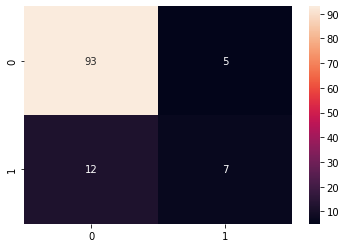

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import seaborn as sn


cm = confusion_matrix(Y_test, X_test_prediction)
print('CONFUSION MATRIX   - \n\n ',cm,'\n\n')
print ( ' \n **Classification Report: \n ' ,metrics . classification_report(Y_test,X_test_prediction))

sn.heatmap(cm,annot=True,fmt='2.0f')